Grover Algoritması
Oracle+Diffuser

Sonuçlar: {5: np.float64(0.499999999999999), 7: np.float64(0.499999999999999)}


C:\Users\alice\AppData\Local\Temp\ipykernel_9772\310365826.py:42: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


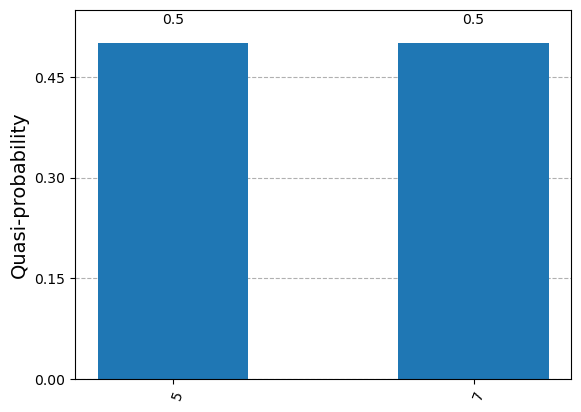

In [13]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import MCXGate  # Çoklu kontrollü X kapısı
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

# 3-qubit sistem oluştur
n = 3
grover_circuit = QuantumCircuit(n)

# Süperpozisyon oluştur (Başlangıç durumu)
grover_circuit.h(range(n))

# Oracle: '101' durumunu işaretle
oracle = QuantumCircuit(n, name="Oracle")
oracle.cz(0, 2)  # 0. ve 2. qubitler arasında Z kapısı (101'i işaretler)
oracle.to_gate()
grover_circuit.append(oracle, range(n))

# Diffuser: Amplifikasyon sağla
def diffuser(n):
    qc = QuantumCircuit(n, name="Diffuser")
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n-1)
    
    # Çoklu kontrollü Toffoli kapısı yerine MCXGate kullan
    mcx = MCXGate(n-1)  # (n-1) kontrollü X kapısı
    qc.append(mcx, range(n))  # Tüm qubitlere uygula
    
    qc.h(n-1)
    qc.x(range(n))
    qc.h(range(n))
    return qc

diff = diffuser(n)
grover_circuit.append(diff, range(n))

# Ölçüm ekle
grover_circuit.measure_all()

# Simülasyon yap (Aer yerine Sampler kullanıyoruz)
sampler = Sampler()
job = sampler.run(grover_circuit)
result = job.result()
counts = result.quasi_dists[0]

# Sonuçları görselleştir
print("Sonuçlar:", counts)
plot_histogram(counts)


Pauli-X Sonrası Durum: [0 1]
Pauli-Y Sonrası Durum: [0.+0.j 0.+1.j]
Pauli-Z Sonrası Durum: [1 0]
Hadamard Sonrası Durum: [0.70710678 0.70710678]


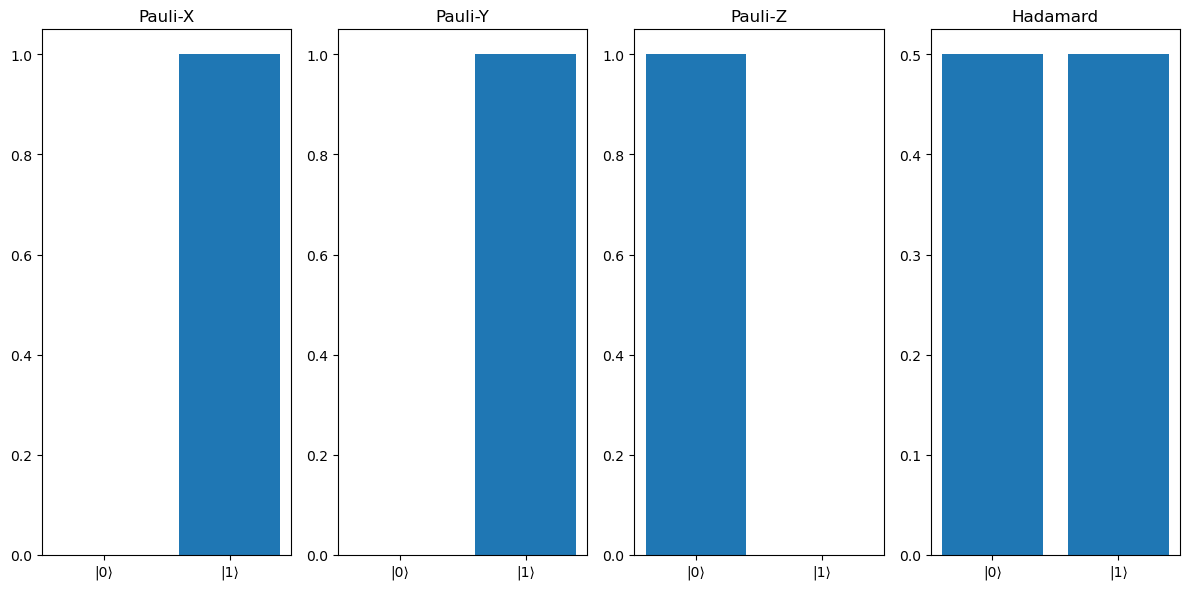

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

# Pauli-X, Pauli-Y, Pauli-Z matrisleri
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

# Hadamard Operatörü (H)
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

# Başlangıç durumu |0⟩ (veya [1, 0])
initial_state = np.array([1, 0])

# Pauli-X kapısını uygula
final_state_x = np.dot(X, initial_state)

# Pauli-Y kapısını uygula
final_state_y = np.dot(Y, initial_state)

# Pauli-Z kapısını uygula
final_state_z = np.dot(Z, initial_state)

# Hadamard uygula
final_state_h = np.dot(H, initial_state)

# Sonuçları yazdır
print("Pauli-X Sonrası Durum:", final_state_x)
print("Pauli-Y Sonrası Durum:", final_state_y)
print("Pauli-Z Sonrası Durum:", final_state_z)
print("Hadamard Sonrası Durum:", final_state_h)

# Durumları görselleştir
plt.figure(figsize=(12, 6))

# Pauli-X Sonrası Durum
plt.subplot(1, 4, 1)
plt.title("Pauli-X")
plt.bar([0, 1], abs(final_state_x)**2, tick_label=["|0⟩", "|1⟩"])

# Pauli-Y Sonrası Durum
plt.subplot(1, 4, 2)
plt.title("Pauli-Y")
plt.bar([0, 1], abs(final_state_y)**2, tick_label=["|0⟩", "|1⟩"])

# Pauli-Z Sonrası Durum
plt.subplot(1, 4, 3)
plt.title("Pauli-Z")
plt.bar([0, 1], abs(final_state_z)**2, tick_label=["|0⟩", "|1⟩"])

# Hadamard Sonrası Durum
plt.subplot(1, 4, 4)
plt.title("Hadamard")
plt.bar([0, 1], abs(final_state_h)**2, tick_label=["|0⟩", "|1⟩"])

plt.tight_layout()
plt.show()


Householder